In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

In [2]:
digits = fetch_openml('mnist_784', version = 1)

In [3]:
# digits

# Extracting the data in to x & y

In [4]:
x = digits['data']
y = digits['target']

In [5]:
x = np.array(x)             # converting 
y = np.array(y,dtype=np.int8)

In [6]:
# data = pd.concat([x,y],axis = 1)

In [7]:
# data.to_csv("Mnist_Dataset.csv")

# Splitting the data

In [8]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

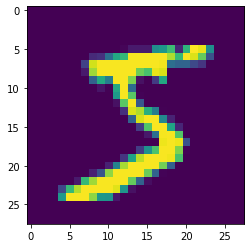

In [9]:
plt.imshow(x[0].reshape(28,28))
plt.show()

In [10]:
from sklearn.linear_model import SGDClassifier,LogisticRegression

In [11]:
sgd_clf = SGDClassifier()
log_reg = LogisticRegression()

In [12]:
y_train_3 = (y_train == 3)

In [13]:
np.unique(y_train_3, return_counts=True) 

(array([False,  True]), array([53869,  6131]))

In [14]:
sgd_clf.fit(x_train,y_train_3)

SGDClassifier()

In [15]:
log_reg.fit(x_train,y_train_3)

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_reg, x_train,y_train_3,cv = 5,scoring = 'accuracy')
score

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

array([0.97116667, 0.97308333, 0.972     , 0.97      , 0.975     ])

In [21]:
score.mean()

0.9722499999999998

In [30]:
# making Never 3 classifier

from sklearn.base import BaseEstimator
class never3(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x),1),dtype = bool)

In [31]:
len(x_train)

60000

In [32]:
score_never_3 = cross_val_score(never3(), x_train,y_train_3,cv = 5,scoring = 'accuracy')
score_never_3

array([0.89766667, 0.89508333, 0.89975   , 0.90008333, 0.8965    ])

In [33]:
score_never_3.mean()

0.8978166666666667

In [49]:
from sklearn.metrics import recall_score, confusion_matrix,classification_report

In [44]:
log_reg.predict(x_test)

array([False, False, False, ..., False, False, False])

In [46]:
recall_score(y_train_3, log_reg.predict(x_train))

0.845212852715707

In [54]:
confusion_matrix(log_reg.predict(x_train),y_train_3 )

array([[53357,   949],
       [  512,  5182]])

In [55]:
5182/(5182+949)

0.845212852715707

In [56]:
5182/(5182+512)

0.9100807867931155

In [52]:
classification_report(y_train_3, log_reg.predict(x_train),output_dict = True)

{'False': {'precision': 0.9825249512024454,
  'recall': 0.9904954612114574,
  'f1-score': 0.9864941067714351,
  'support': 53869},
 'True': {'precision': 0.9100807867931155,
  'recall': 0.845212852715707,
  'f1-score': 0.8764482029598308,
  'support': 6131},
 'accuracy': 0.97565,
 'macro avg': {'precision': 0.9463028689977805,
  'recall': 0.9178541569635822,
  'f1-score': 0.9314711548656329,
  'support': 60000},
 'weighted avg': {'precision': 0.975122365002552,
  'recall': 0.97565,
  'f1-score': 0.975249249500286,
  'support': 60000}}